<a href="https://colab.research.google.com/github/iamZaid-Alam/DP/blob/main/1/DP_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, random_state=41, class_sep=10, hypercube=False,
                           n_clusters_per_class=1, n_classes=2)
print(X.shape, y.shape)

(100, 2) (100,)


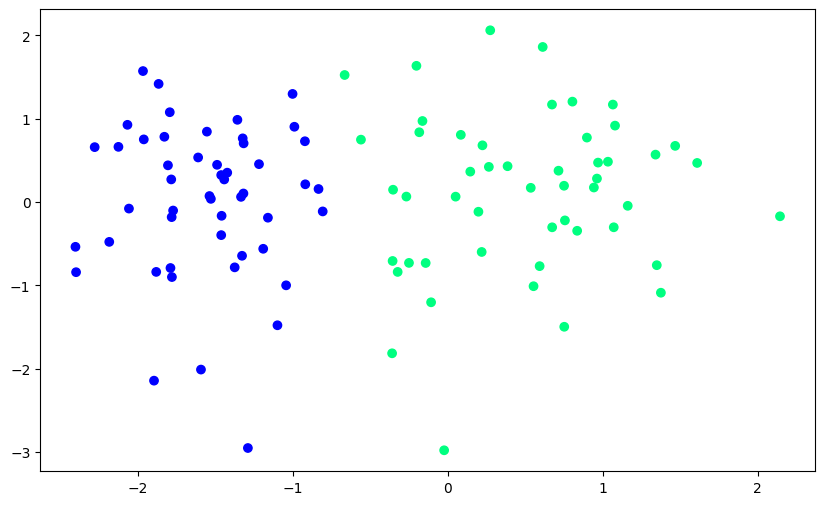

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.show()

In [39]:
def perceptron(X,y):

  X = np.insert(X,0,1,axis=1) # adding X0
  weights = np.ones(X.shape[1])
  lr = 0.1
  weight_history = [] # List to store weights at each iteration

  for i in range(1000):
    j = np.random.randint(0,100) #select random value
    y_hat = step(np.dot(weights,X[j]))
    weights = weights + lr*(y[j]-y_hat)*X[j]
    weight_history.append(weights.copy()) # Store a copy of the weights

  return weights[0],weights[1:], weight_history

In [40]:
def step(z):
  return 1 if z > 0 else 0

In [41]:
intercept_, coef_, weight_history = perceptron(X,y)

In [42]:
print(intercept_)
print(coef_)

1.0
[1.38555764 0.11958909]


In [48]:
!pip install imageio imageio-ffmpeg -q

In [49]:
import imageio
import glob

# Get the list of frame file paths
frame_files = glob.glob('frames/frame_*.png')
frame_files.sort() # Sort the files to ensure correct order

# Create the GIF
with imageio.get_writer('perceptron_animation.gif', mode='I', duration=0.1) as writer:
    for filename in frame_files:
        image = imageio.imread(filename)
        writer.append_data(image)

print("Animation created: perceptron_animation.gif")

/tmp/ipython-input-3333990419.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Animation created: perceptron_animation.gif


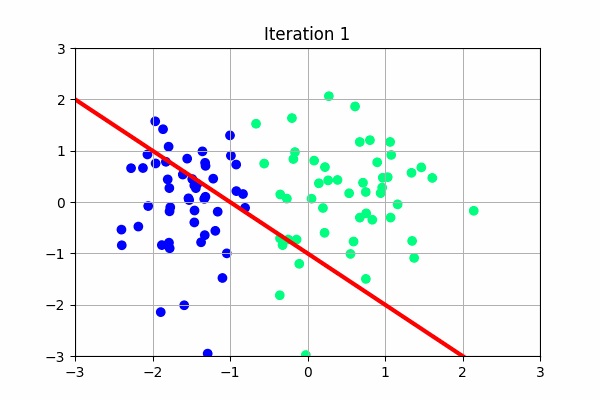

In [50]:
from IPython.display import Image
Image(open('perceptron_animation.gif','rb').read())

In [43]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [44]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

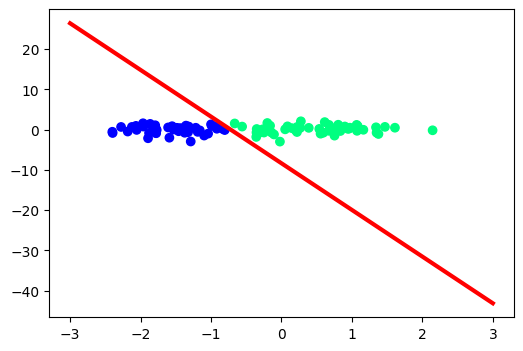

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.plot(x_input,y_input,color='red', linewidth=3)
plt.show()

In [46]:
import os

# Create a directory to save the frames
if not os.path.exists('frames'):
    os.makedirs('frames')

intercept_, coef_, weight_history = perceptron(X,y)

# Generate and save frames
for i, weights in enumerate(weight_history):
    intercept = weights[0]
    coef = weights[1:]
    plt = plot_perceptron(intercept, coef, X, y, title=f'Iteration {i+1}')
    plt.savefig(f'frames/frame_{i:04d}.png')
    plt.close() # Close the plot to free up memory

print("Frames generated and saved in the 'frames' directory.")

Frames generated and saved in the 'frames' directory.


In [47]:
def plot_perceptron(intercept, coef, X, y, title):
    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')

    if coef[1] != 0: # Avoid division by zero
      m = -(coef[0]/coef[1])
      b = -(intercept/coef[1])
      x_input = np.linspace(-3,3,100)
      y_input = m*x_input + b
      plt.plot(x_input,y_input,color='red', linewidth=3)

    plt.title(title)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid(True)
    return plt